In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r "/content/drive/MyDrive/archive" "/content/"


In [3]:
!pip install opencv-python-headless
!pip install ultralytics
!pip install matplotlib
!pip install ipython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import cv2
import os
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def display_sequence_with_tracking(sequence_path, model_path='yolov8n.pt'):

    model = YOLO(model_path)
    video_frames = []
    class_names = model.names


    image_files = sorted([f for f in os.listdir(sequence_path) if f.endswith('.jpg')])

    if not image_files:
        print("Aucune image trouvée dans le dossier.")
        return

    print(f"{len(image_files)} images trouvées.")

    object_tracks = {}

    for image_file in image_files:
        image_path = os.path.join(sequence_path, image_file)

        frame = cv2.imread(image_path)
        if frame is None:
            print(f"Erreur lors du chargement de l'image {image_file}")
            continue

        results = model(frame)[0]
        detections = []

        for det in results.boxes:
            x1, y1, x2, y2 = det.xyxy.cpu().numpy()[0]
            conf = det.conf.cpu().numpy()[0]
            cls = int(det.cls.cpu().numpy()[0])
            detections.append([x1, y1, x2, y2, conf, cls])

        detections = np.array(detections)

        for i, det in enumerate(detections):
            x1, y1, x2, y2, conf, cls = det
            object_id = cls

            if object_id not in object_tracks:
                object_tracks[object_id] = []

            object_tracks[object_id].append([int(x1), int(y1), int(x2), int(y2)])

            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)

            class_name = class_names[cls]
            cv2.putText(frame, f'{class_name}', (int(x1), int(y1) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3, cv2.LINE_AA)

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        video_frames.append(frame_rgb)

    if len(video_frames) == 0:
        print("Aucune frame n'a été traitée. Vérifiez les images.")
        return

    print(f"{len(video_frames)} frames ont été traitées.")

    def display_video(video):
        fig = plt.figure(figsize=(8, 8))

        mov = []
        for i in range(len(video)):
            img = plt.imshow(video[i], animated=True)
            plt.axis('off')
            mov.append([img])

        anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

        plt.close()
        return anime

    return HTML(display_video(video_frames).to_html5_video())


sequence_path = "archive/Consumers/Sequence_ID126"
display_sequence_with_tracking(sequence_path)


54 images trouvées.

0: 384x640 2 microwaves, 553.6ms
Speed: 43.8ms preprocess, 553.6ms inference, 51.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 microwaves, 246.3ms
Speed: 4.8ms preprocess, 246.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 microwave, 258.5ms
Speed: 7.4ms preprocess, 258.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 microwave, 274.9ms
Speed: 4.9ms preprocess, 274.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 microwave, 236.6ms
Speed: 4.8ms preprocess, 236.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 microwave, 247.5ms
Speed: 4.8ms preprocess, 247.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 microwaves, 257.6ms
Speed: 4.5ms preprocess, 257.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 microwaves, 233.8ms
Speed: 5.0ms preprocess,

In [4]:
!pip install perlin-noise


In [ ]:
from perlin_noise import PerlinNoise
def add_perlin_noise(image, scale=30, intensity=40):
    """
    Ajoute du bruit de Perlin à une image.
    - scale : échelle du bruit (plus grand = motifs plus larges)
    - intensity : intensité du bruit ajouté
    """
    h, w, _ = image.shape
    noise = PerlinNoise(octaves=4)

    noise_map = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            noise_map[i, j] = noise([i / scale, j / scale])

    noise_map = (noise_map - np.min(noise_map)) / (np.max(noise_map) - np.min(noise_map))  # Normalisation
    noise_map = (noise_map * 2 - 1) * intensity  # Ajuster l'intensité

    # Appliquer le bruit à l'image
    noisy_image = np.clip(image.astype(np.float32) + noise_map[:, :, None], 0, 255).astype(np.uint8)

    return noisy_image

In [ ]:
def load_ground_truth(gt_file):
    gt_data = {}
    with open(gt_file, "r") as file:
        for line in file:
            parts = line.strip().split(",")
            frame_id = int(parts[0])
            x, y, w, h = map(float, parts[2:6])  # Bounding box format (x, y, width, height)
            if frame_id not in gt_data:
                gt_data[frame_id] = []
            gt_data[frame_id].append([x, y, x + w, y + h])  # Convertir en (x1, y1, x2, y2)
    return gt_data

In [ ]:
def iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1, yi1 = max(x1, x1g), max(y1, y1g)
    xi2, yi2 = min(x2, x2g), min(y2, y2g)

    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area else 0

In [ ]:
def display_video(frames):
    fig = plt.figure(figsize=(8, 8))
    mov = [[plt.imshow(frame, animated=True)] for frame in frames]
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)
    plt.close()
    return anime

In [ ]:

# strategie 1 pour j1: precision faible
# strategie 1 pour j2: bruit faible
def process_sequence(sequence_folder, model_path='yolov8n.pt'):
    model = YOLO(model_path)
    gt_file = os.path.join(sequence_folder, "gt", "gt.txt")
    gt_data = load_ground_truth(gt_file)

    noise = PerlinNoise(octaves=3)

    frames = sorted([f for f in os.listdir(sequence_folder) if f.endswith(".jpg")])
    video_frames = []
    iou_scores = []

    for frame_name in frames:
        frame_id = int(frame_name.split(".")[0].replace("frame", ""))
        frame_path = os.path.join(sequence_folder, frame_name)
        frame = cv2.imread(frame_path)

        if frame is None:
            continue

        results = model(frame)[0]
        yolo_boxes = []

        for det in results.boxes:
            x1, y1, x2, y2 = det.xyxy.cpu().numpy()[0]

            noise_x = noise([x1 / frame.shape[1]]) * 10
            noise_y = noise([y1 / frame.shape[0]]) * 10
            x1, y1, x2, y2 = x1 + noise_x, y1 + noise_y, x2 + noise_x, y2 + noise_y

            yolo_boxes.append([x1, y1, x2, y2])

            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 3)
            cv2.putText(frame, "YOLO", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        if frame_id in gt_data:
            for gt_box in gt_data[frame_id]:
                x1, y1, x2, y2 = map(int, gt_box)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
                cv2.putText(frame, "GT", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                best_iou = max((iou(pred_box, gt_box) for pred_box in yolo_boxes), default=0)
                iou_scores.append(best_iou)

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        video_frames.append(frame_rgb)

    print(f"Nombre total de frames traitées : {len(video_frames)}")
    print(f"Moyenne IoU : {np.mean(iou_scores):.4f}")

    return HTML(display_video(video_frames).to_html5_video())


In [ ]:
sequence_path = "archive/Consumers/Sequence_ID126"
process_sequence(sequence_path)


0: 384x640 2 microwaves, 187.9ms
Speed: 4.5ms preprocess, 187.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 microwaves, 161.1ms
Speed: 6.8ms preprocess, 161.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 microwave, 169.7ms
Speed: 6.9ms preprocess, 169.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 microwave, 182.3ms
Speed: 5.4ms preprocess, 182.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 microwave, 152.4ms
Speed: 6.3ms preprocess, 152.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 microwave, 192.1ms
Speed: 6.2ms preprocess, 192.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 microwaves, 198.3ms
Speed: 7.0ms preprocess, 198.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 microwaves, 191.6ms
Speed: 4.5ms preprocess, 191.6ms inference, 1.

In [ ]:

# strategie 1 pour j1: precision faible
# strategie 2 pour j2: bruit elevé"

from perlin_noise import PerlinNoise
def add_perlin_noise(image, scale=30, intensity=40):
    """
    Ajoute du bruit de Perlin à une image.
    - scale : échelle du bruit (plus grand = motifs plus larges)
    - intensity : intensité du bruit ajouté
    """
    h, w, _ = image.shape
    noise = PerlinNoise(octaves=4)

    noise_map = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            noise_map[i, j] = noise([i / scale, j / scale])

    noise_map = (noise_map - np.min(noise_map)) / (np.max(noise_map) - np.min(noise_map))  # Normalisation
    noise_map = (noise_map * 2 - 1) * intensity  # Ajuster l'intensité

    noisy_image = np.clip(image.astype(np.float32) + noise_map[:, :, None], 0, 255).astype(np.uint8)

    return noisy_image


def process_sequence(sequence_folder, model_path='yolov8n.pt'):
    model = YOLO(model_path)
    gt_file = os.path.join(sequence_folder, "gt", "gt.txt")
    gt_data = load_ground_truth(gt_file)

    noise = PerlinNoise(octaves=3)

    frames = sorted([f for f in os.listdir(sequence_folder) if f.endswith(".jpg")])
    video_frames = []
    iou_scores = []

    for frame_name in frames:
        frame_id = int(frame_name.split(".")[0].replace("frame", ""))
        frame_path = os.path.join(sequence_folder, frame_name)
        frame = cv2.imread(frame_path)

        if frame is None:
            continue

        # Appliquer du bruit de Perlin à l'image
        frame = add_perlin_noise(frame)

        # Détection avec YOLO
        results = model(frame)[0]
        yolo_boxes = []

        for det in results.boxes:
            x1, y1, x2, y2 = det.xyxy.cpu().numpy()[0]

            noise_x = noise([x1 / frame.shape[1]]) * 10
            noise_y = noise([y1 / frame.shape[0]]) * 10
            x1, y1, x2, y2 = x1 + noise_x, y1 + noise_y, x2 + noise_x, y2 + noise_y

            yolo_boxes.append([x1, y1, x2, y2])

            # Dessiner la boîte détectée
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 3)
            cv2.putText(frame, "YOLO", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Dessiner les boîtes du ground truth
        if frame_id in gt_data:
            for gt_box in gt_data[frame_id]:
                x1, y1, x2, y2 = map(int, gt_box)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
                cv2.putText(frame, "GT", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # Comparer avec les prédictions
                best_iou = max((iou(pred_box, gt_box) for pred_box in yolo_boxes), default=0)
                iou_scores.append(best_iou)

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        video_frames.append(frame_rgb)

    # Afficher l'animation
    print(f"Nombre total de frames traitées : {len(video_frames)}")
    print(f"Moyenne IoU : {np.mean(iou_scores):.4f}")

    return HTML(display_video(video_frames).to_html5_video())


sequence_path = "archive/Consumers/Sequence_ID126"
print("commencer la fonction");
process_sequence(sequence_path)


commencer la fonction

0: 384x640 1 tie, 1 bottle, 236.3ms
Speed: 6.0ms preprocess, 236.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 158.1ms
Speed: 4.9ms preprocess, 158.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 163.6ms
Speed: 6.7ms preprocess, 163.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 256.0ms
Speed: 4.9ms preprocess, 256.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 155.5ms
Speed: 9.7ms preprocess, 155.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 153.9ms
Speed: 9.2ms preprocess, 153.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 198.0ms
Speed: 4.8ms preprocess, 198.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 151.5ms
Speed: 4.7ms preprocess,


0: 384x640 (no detections), 1806.6ms
Speed: 3.6ms preprocess, 1806.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1794.5ms
Speed: 4.9ms preprocess, 1794.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1774.8ms
Speed: 4.7ms preprocess, 1774.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3456.2ms
Speed: 4.6ms preprocess, 3456.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 3605.4ms
Speed: 25.3ms preprocess, 3605.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 2376.6ms
Speed: 5.5ms preprocess, 2376.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1789.3ms
Speed: 4.3ms preprocess, 1789.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1799.7ms
Sp

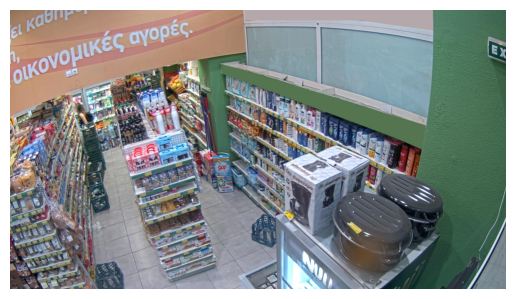

In [32]:
# strategie 1 pour j1: precision forte
# strategie 1 pour j2: bruit faible

def process_sequence(sequence_folder, model_path='yolov8l.pt'):
    model = YOLO(model_path)
    gt_file = os.path.join(sequence_folder, "gt", "gt.txt")
    gt_data = load_ground_truth(gt_file)

    noise = PerlinNoise(octaves=3)

    frames = sorted([f for f in os.listdir(sequence_folder) if f.endswith(".jpg")])
    video_frames = []
    iou_scores = []

    for frame_name in frames:
        frame_id = int(frame_name.split(".")[0].replace("frame", ""))
        frame_path = os.path.join(sequence_folder, frame_name)
        frame = cv2.imread(frame_path)

        if frame is None:
            continue

        # Détection avec YOLOv8 avec seuil de confiance élevé et NMS ajusté
        results = model(frame, conf=0.5, iou=0.4)[0]
        yolo_boxes = []

        for det in results.boxes:
            x1, y1, x2, y2 = det.xyxy.cpu().numpy()[0]

            noise_x = noise([x1 / frame.shape[1]]) * 10
            noise_y = noise([y1 / frame.shape[0]]) * 10
            x1, y1, x2, y2 = x1 + noise_x, y1 + noise_y, x2 + noise_x, y2 + noise_y

            yolo_boxes.append([x1, y1, x2, y2])

            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 3)
            cv2.putText(frame, "YOLO", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        if frame_id in gt_data:
            for gt_box in gt_data[frame_id]:
                x1, y1, x2, y2 = map(int, gt_box)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
                cv2.putText(frame, "GT", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                best_iou = max((iou(pred_box, gt_box) for pred_box in yolo_boxes), default=0)
                iou_scores.append(best_iou)

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        video_frames.append(frame_rgb)

    print(f"Nombre total de frames traitées : {len(video_frames)}")
    print(f"Moyenne IoU : {np.mean(iou_scores):.4f}")

    return HTML(display_video(video_frames).to_html5_video())

sequence_path = "archive/Consumers/Sequence_ID126"
process_sequence(sequence_path)


0: 384x640 (no detections), 1850.8ms
Speed: 5.0ms preprocess, 1850.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Frame 1: YOLO Predictions:

0: 384x640 (no detections), 2649.4ms
Speed: 5.9ms preprocess, 2649.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Frame 2: YOLO Predictions:

0: 384x640 (no detections), 1794.1ms
Speed: 5.0ms preprocess, 1794.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Frame 3: YOLO Predictions:

0: 384x640 (no detections), 1826.8ms
Speed: 4.2ms preprocess, 1826.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Frame 4: YOLO Predictions:

0: 384x640 (no detections), 2840.4ms
Speed: 8.1ms preprocess, 2840.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Frame 5: YOLO Predictions:

0: 384x640 (no detections), 1810.9ms
Speed: 4.7ms preprocess, 1810.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Frame 6: YOLO Predictions:

0: 384x640 (no 

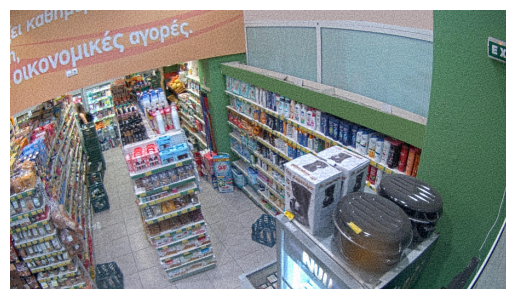

In [36]:
# strategie 2 pour j1: precision forte
# strategie 2 pour j2: bruit fort


def iou(box1, box2):
    # Coordonner des boîtes (x1, y1, x2, y2)
    x1_intersection = max(box1[0], box2[0])
    y1_intersection = max(box1[1], box2[1])
    x2_intersection = min(box1[2], box2[2])
    y2_intersection = min(box1[3], box2[3])

    intersection_area = max(0, x2_intersection - x1_intersection) * max(0, y2_intersection - y1_intersection)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - intersection_area

    if union_area == 0:
        return 0
    return intersection_area / union_area



def add_perlin_noise(image, scale=50, intensity=60):
    """
    Ajoute du bruit de Perlin à une image.
    - scale : échelle du bruit (plus grand = motifs plus larges)
    - intensity : intensité du bruit ajouté
    """
    h, w, _ = image.shape
    noise = PerlinNoise(octaves=4)

    noise_map = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            noise_map[i, j] = noise([i / scale, j / scale])

    noise_map = (noise_map - np.min(noise_map)) / (np.max(noise_map) - np.min(noise_map))  # Normalisation
    noise_map = (noise_map * 2 - 1) * intensity  # Ajuster l'intensité

    # Appliquer le bruit à l'image
    noisy_image = np.clip(image.astype(np.float32) + noise_map[:, :, None], 0, 255).astype(np.uint8)

    return noisy_image

def process_sequence(sequence_folder, model_path='yolov8l.pt'):

    model = YOLO(model_path)
    gt_file = os.path.join(sequence_folder, "gt", "gt.txt")
    gt_data = load_ground_truth(gt_file)

    frames = sorted([f for f in os.listdir(sequence_folder) if f.endswith(".jpg")])
    video_frames = []
    iou_scores = []

    for frame_name in frames:
        frame_id = int(frame_name.split(".")[0].replace("frame", ""))
        frame_path = os.path.join(sequence_folder, frame_name)
        frame = cv2.imread(frame_path)

        if frame is None:
            continue

        # Appliquer le bruit de Perlin à l'image
        noisy_frame = add_perlin_noise(frame, scale=30, intensity=40)

        # Détection avec YOLOv8 avec seuil de confiance élevé et NMS ajusté
        results = model(noisy_frame, conf=0.6, iou=0.7)[0]  # Augmenter les seuils pour plus de précision
        yolo_boxes = []

        print(f"Frame {frame_id}: YOLO Predictions:")

        for det in results.boxes:
            x1, y1, x2, y2 = det.xyxy.cpu().numpy()[0]
            yolo_boxes.append([x1, y1, x2, y2])

            # Dessiner la boîte détectée
            cv2.rectangle(noisy_frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 3)
            cv2.putText(noisy_frame, "YOLO", (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

            # Afficher les coordonnées des boîtes YOLO
            print(f"  - Prediction Box: {x1, y1, x2, y2}")

        # Dessiner les boîtes du ground truth
        if frame_id in gt_data:
            print(f"Frame {frame_id}: Ground Truth Boxes:")

            for gt_box in gt_data[frame_id]:
                x1, y1, x2, y2 = map(int, gt_box)

                cv2.rectangle(noisy_frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
                cv2.putText(noisy_frame, "GT", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # Afficher les coordonnées des boîtes GT
                print(f"  - Ground Truth Box: {x1, y1, x2, y2}")

                # Comparer avec les prédictions
                best_iou = max((iou(pred_box, gt_box) for pred_box in yolo_boxes), default=0)
                iou_scores.append(best_iou)

        # Convertir en RGB pour affichage
        frame_rgb = cv2.cvtColor(noisy_frame, cv2.COLOR_BGR2RGB)
        video_frames.append(frame_rgb)

    # Supprimer la ligne cap.release() si présente

    # Afficher l'animation
    print(f"Nombre total de frames traitées : {len(video_frames)}")
    print(f"Moyenne IoU : {np.mean(iou_scores):.4f}")

    return HTML(display_video(video_frames).to_html5_video())

sequence_path = "archive/Consumers/Sequence_ID126"
process_sequence(sequence_path)




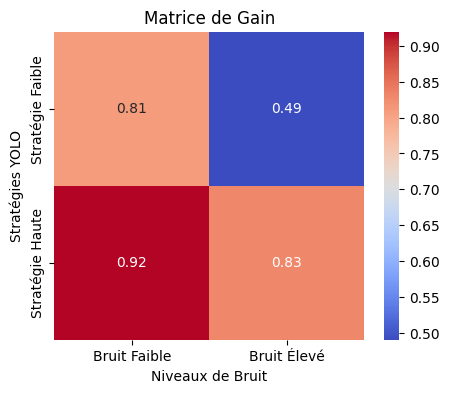

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Définir la matrice de gain
matrice_gain = np.array([[0.81, 0.49], [0.92, 0.83]])

# Tracer la heatmap
plt.figure(figsize=(5, 4))  # Taille de la figure
sns.heatmap(matrice_gain, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, xticklabels=['Bruit Faible', 'Bruit Élevé'], yticklabels=['Stratégie Faible', 'Stratégie Haute'])

# Ajouter des labels et un titre
plt.title('Matrice de Gain')
plt.xlabel('Niveaux de Bruit')
plt.ylabel('Stratégies YOLO')

# Afficher la figure
plt.show()


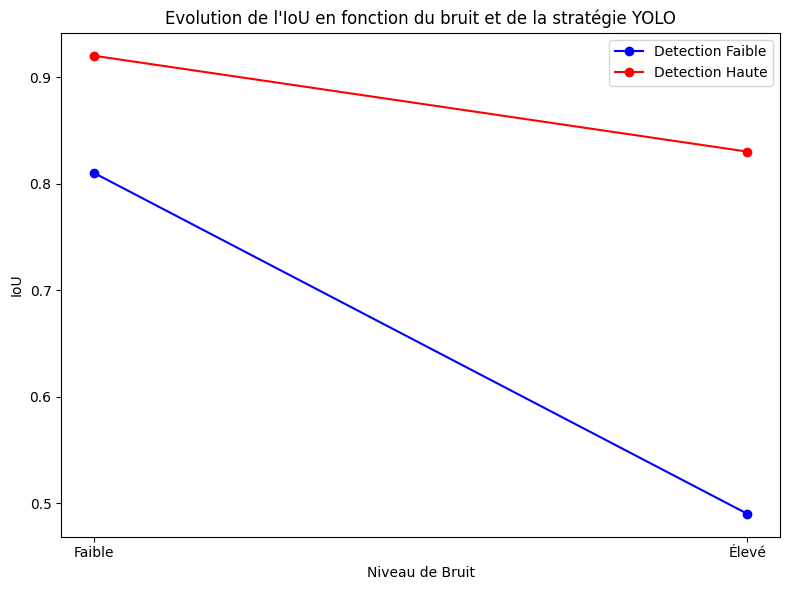

In [14]:
import matplotlib.pyplot as plt

niveaux_bruit = ['Faible', 'Élevé']

iou_faible = [0.81, 0.49]
iou_haute = [0.92, 0.83]

plt.figure(figsize=(8, 6))
plt.plot(niveaux_bruit, iou_faible, label='Detection Faible', marker='o', color='blue')
plt.plot(niveaux_bruit, iou_haute, label='Detection Haute', marker='o', color='red')

plt.title("Evolution de l'IoU en fonction du bruit et de la stratégie YOLO")
plt.xlabel("Niveau de Bruit")
plt.ylabel("IoU")
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
import numpy as np

payoffs = np.array([
    [0.81, 0.49],
    [0.92, 0.83]
])

# Calcul du Maxmin pour YOLO : Le maximum des minimums pour chaque ligne (stratégie de YOLO)
maxmin_x = np.max(np.min(payoffs, axis=1))
print(f"Maxmin pour YOLO : {maxmin_x}")

# Calcul du Minmax pour Bruit : Le minimum des maxima pour chaque colonne (stratégie de Bruit)
minmax_y = np.min(np.max(payoffs, axis=0))
print(f"Minmax pour Bruit : {minmax_y}")

if maxmin_x == minmax_y:
    print("Le jeu a une valeur en stratégie pure!")
else:
    print("Le jeu n'a pas de valeur en stratégie pure.")


Maxmin pour YOLO : 0.83
Minmax pour Bruit : 0.83
Le jeu a une valeur en stratégie pure!


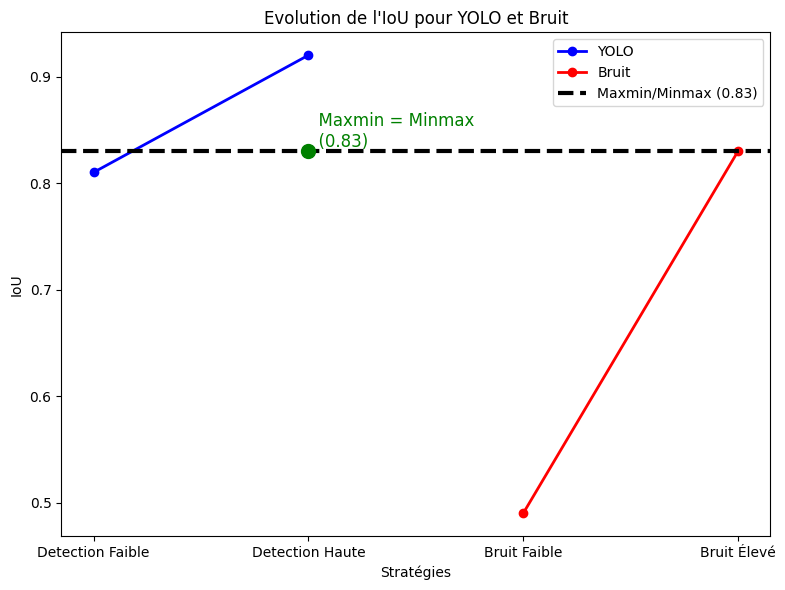

In [18]:
import matplotlib.pyplot as plt

strats_yo = ['Detection Faible', 'Detection Haute']
strats_bruit = ['Bruit Faible', 'Bruit Élevé']
iou_values_yo = [0.81, 0.92]
iou_values_bruit = [0.49, 0.83]

plt.figure(figsize=(8, 6))
plt.plot(strats_yo, iou_values_yo, label="YOLO", marker='o', color='blue', linestyle='-', linewidth=2)
plt.plot(strats_bruit, iou_values_bruit, label="Bruit", marker='o', color='red', linestyle='-', linewidth=2)

plt.axhline(y=0.83, color='black', linestyle='--', linewidth=3, label="Maxmin/Minmax (0.83)")

plt.scatter(1, 0.83, color='green', s=100, zorder=5)
plt.text(1, 0.83, '  Maxmin = Minmax\n  (0.83)', color='green', fontsize=12, verticalalignment='bottom', horizontalalignment='left')

plt.title("Evolution de l'IoU pour YOLO et Bruit")
plt.xlabel("Stratégies")
plt.ylabel("IoU")
plt.legend()

plt.tight_layout()
plt.show()
